let's try loading in our data.

In [29]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

# Show all columns (adjust to 1000 or higher if needed)
#pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap DataFrame across lines

let's try loading the liver cancer data from GDC TCGA from the UC San Diego Xena Browser

note that we're using the rna seq 

liver: "https://xenabrowser.net/datapages/?cohort=GDC%20TCGA%20Liver%20Cancer%20(LIHC)&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443"

In [30]:
liver_path = "/Users/tirdodbehbehani/Desktop/BSE/Term 3/Thesis/master_thesis_git/data/LIVER"
#liver_path = "C:/Users/elisa/OneDrive/Desktop/Thesis/master_thesis/data/LIVER"
#liver_path = "/Users/inigo/Downloads/DATA/LIVER"

In [31]:
# Adjust the filename if you're using FPKM-UQ
liver_gene_expression_path = os.path.join(liver_path, "TCGA-LIHC.star_tpm.tsv.gz")
liver_gene_expression = pd.read_csv(liver_gene_expression_path, sep='\t', index_col=0)

# Inspect the data
liver_gene_expression.head()

,TCGA-5R-AA1C-01A,TCGA-ED-A66Y-01A,TCGA-DD-AAEI-01A,TCGA-ED-A8O5-01A,TCGA-DD-A3A2-11A,TCGA-DD-AACH-01A,TCGA-FV-A3R3-01A,TCGA-G3-A5SJ-01A,TCGA-HP-A5MZ-01A,TCGA-ZP-A9D0-01A,...,TCGA-DD-A3A5-01A,TCGA-DD-AACY-01A,TCGA-DD-AACC-01A,TCGA-CC-A7IH-01A,TCGA-BW-A5NO-01A,TCGA-CC-A7IJ-01A,TCGA-G3-AAV1-01A,TCGA-DD-AACI-01A,TCGA-CC-A9FS-01A,TCGA-GJ-A3OU-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,6.863447,5.221413,5.315668,5.766399,5.427251,3.865988,6.379536,5.821672,6.754632,6.584728,...,5.335033,5.091780,5.672468,6.725188,6.534760,5.725351,6.200024,4.753011,8.499618,5.338107
ENSG00000000005.6,0.254836,0.000000,0.051581,0.157044,0.264957,0.000000,0.000000,0.054918,0.089363,0.000000,...,0.177726,0.000000,0.063089,0.000000,0.196859,0.856149,0.233029,0.000000,0.524565,0.139731
ENSG00000000419.13,6.909411,5.999260,5.328535,5.013636,5.325527,6.363115,5.272307,5.983828,5.498602,5.632617,...,6.385374,5.460867,6.417653,5.903426,7.267551,6.131995,6.280329,5.462955,5.714644,6.002165
ENSG00000000457.14,3.362007,3.694713,1.576909,3.533090,1.848197,3.927157,2.489954,2.557484,2.308943,3.498315,...,1.670342,2.708717,1.997798,3.471526,2.132544,2.231647,2.514223,2.431997,2.142021,2.513289
ENSG00000000460.17,4.462321,2.120053,0.805045,2.011424,0.408821,3.301427,0.979586,1.427231,1.313710,1.204579,...,1.371726,0.810895,1.279293,3.676832,1.246773,3.320701,1.446044,0.712111,1.047818,1.166201


In [32]:
liver_survival_path = os.path.join(liver_path, "TCGA-LIHC.survival.tsv.gz")
liver_survival = pd.read_csv(liver_survival_path, sep='\t')

# Inspect
liver_survival.head()

,sample,OS.time,OS,_PATIENT
0,TCGA-FV-A495-01A,1.0,0,TCGA-FV-A495
1,TCGA-ED-A7PX-01A,6.0,0,TCGA-ED-A7PX
2,TCGA-ED-A7PZ-01A,6.0,0,TCGA-ED-A7PZ
3,TCGA-ED-A97K-01A,6.0,0,TCGA-ED-A97K
4,TCGA-BC-A3KF-01A,8.0,0,TCGA-BC-A3KF


In [33]:
liver_pheno_path = os.path.join(liver_path, "TCGA-LIHC.clinical.tsv.gz")
liver_phenotype = pd.read_csv(liver_pheno_path, sep='\t')

# Inspect
liver_phenotype.head()

,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-DD-A73C-01A,79f9331c-9e00-4277-a9d1-7c848e132134,Adenomas and Adenocarcinomas,79f9331c-9e00-4277-a9d1-7c848e132134,TCGA-DD-A73C,Liver and intrahepatic bile ducts,Not Reported,white,female,not hispanic or latino,...,Primary Tumor,Not Reported,288.0,160.0,Unknown,FE051CD7-9C34-4A45-934C-DD8BB00C717A,False,Solid Tissue,False,Tumor
1,TCGA-5C-AAPD-01A,7a6162a4-1166-4310-84cd-ffc2b06f124c,Adenomas and Adenocarcinomas,7a6162a4-1166-4310-84cd-ffc2b06f124c,TCGA-5C-AAPD,Liver and intrahepatic bile ducts,Not Reported,asian,male,not hispanic or latino,...,Primary Tumor,Not Reported,55.0,140.0,OCT,E4DB31C4-89F3-4D8D-A32E-B42C599904E1,True,Solid Tissue,False,Tumor
2,TCGA-ZS-A9CE-01A,7bdc5f86-4d7d-4f1f-bc23-ab51fa9fb947,Adenomas and Adenocarcinomas,7bdc5f86-4d7d-4f1f-bc23-ab51fa9fb947,TCGA-ZS-A9CE,Liver and intrahepatic bile ducts,Not Reported,white,female,not hispanic or latino,...,Primary Tumor,Not Reported,967.0,10.0,OCT,35A87F65-19F9-4C03-8A82-FFBF2C3C568A,True,Solid Tissue,False,Tumor
3,TCGA-HP-A5N0-01A,7f8e25d4-6021-4327-96ab-79b6fcc97a24,Adenomas and Adenocarcinomas,7f8e25d4-6021-4327-96ab-79b6fcc97a24,TCGA-HP-A5N0,Liver and intrahepatic bile ducts,Not Reported,not reported,female,not reported,...,Primary Tumor,Not Reported,NaN,350.0,Unknown,0221A6F3-34F5-407E-8548-B62F27F66FCE,False,Solid Tissue,False,Tumor
4,TCGA-DD-AAVQ-01A,80e7742f-abbe-4f11-b4e4-c999dc1bd459,Adenomas and Adenocarcinomas,80e7742f-abbe-4f11-b4e4-c999dc1bd459,TCGA-DD-AAVQ,Liver and intrahepatic bile ducts,Not Reported,asian,male,not hispanic or latino,...,Primary Tumor,Not Reported,2464.0,80.0,OCT,A58E32BF-829C-48AB-BC80-919A295D78D5,True,Solid Tissue,False,Tumor


🔬 1. gene_expression table

This is a wide-format gene expression matrix, where:
	•	Rows = Genes
Example: ENSG00000000003 is gene TSPAN6.
	•	Columns = Samples
Columns like Hyb1, Hyb20, GSM707333, or TCGA-55-A48X-01A are sample IDs.
	•	Cells = Expression levels
Values like 10.416382 are normalized expression levels, often in log2 scale.

🧠 Interpretation:

This table shows how much each gene is expressed in each sample. Expression differences between samples (e.g. smoker vs non-smoker) are what you’ll study.

📊 2. phenotype table

This is a clinical metadata table for each sample or patient. Each row corresponds to a sample (like TCGA-55-A48X-01A) and includes a ton of clinical and demographic variables, such as:
	•	cigarettes_per_day, years_smoked, pack_years_smoked
	•	gender, race, ethnicity, age_at_diagnosis
	•	ajcc_pathologic_stage, tumor_grade, primary_diagnosis
	•	sample_type, tissue_type, etc.

🧠 Interpretation:

This provides the context for each sample—it helps you answer: “Which samples came from smokers? Which had lung adenocarcinoma? What were their tumor stages?”

🧬 3. survival table

This table links each TCGA sample to survival outcomes, with columns like:
	•	sample: TCGA sample ID (e.g., TCGA-NJ-A4YI-01A)
	•	OS.time: overall survival time (in years or months)
	•	OS: event indicator (1 = dead, 0 = alive)
	•	_PATIENT: patient-level ID (e.g., TCGA-NJ-A4YI)

🧠 Interpretation:

This allows you to link gene expression to patient prognosis. For example, is high expression of gene X associated with poor survival?

In [34]:
# Transpose the liver_gene_expression matrix so that sample IDs are columns
liver_gene_expression_transposed = liver_gene_expression.T  # Sample IDs become columns

# Now, rename the index to 'sample_id' (assuming the index is the sample_id after transposition)
liver_gene_expression_transposed.reset_index(inplace=True)
liver_gene_expression_transposed.rename(columns={'index': 'sample'}, inplace=True)

# Merge the transposed gene expression dataframe with the liver_survival and liver_phenotype dataframes
liver_combined_df = liver_gene_expression_transposed.merge(liver_survival, on='sample', how='inner') \
                                                   .merge(liver_phenotype, on='sample', how='inner')

# Display the shape of the combined dataframe
print(f"Combined liver dataframe shape: {liver_combined_df.shape}")

Combined liver dataframe shape: (418, 60746)


In [35]:
liver_combined_df.head()

,sample,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-5R-AA1C-01A,6.863447,0.254836,6.909411,3.362007,4.462321,1.206081,9.331555,4.587533,6.080406,...,Primary Tumor,Not Reported,60.0,750.0,Unknown,AF0BACCE-3975-4E9F-9272-404229EC77C9,False,Solid Tissue,False,Tumor
1,TCGA-ED-A66Y-01A,5.221413,0.000000,5.999260,3.694713,2.120053,1.732009,4.040410,5.958673,3.288373,...,Primary Tumor,Not Reported,75.0,1670.0,OCT,14F29317-F7B9-49D4-B215-EF489A4283CA,True,Solid Tissue,False,Tumor
2,TCGA-DD-AAEI-01A,5.315668,0.051581,5.328535,1.576909,0.805045,2.100809,8.066063,6.073636,4.817429,...,Primary Tumor,Not Reported,1238.0,10.0,OCT,405C1F31-C46C-4288-83BA-9BBFA4F7DF2E,True,Solid Tissue,False,Tumor
3,TCGA-ED-A8O5-01A,5.766399,0.157044,5.013636,3.533090,2.011424,1.858299,8.087634,5.112400,6.187475,...,Primary Tumor,Not Reported,100.0,950.0,OCT,6C198F5C-9B63-45D9-A83D-4CFEC01DDC8C,True,Solid Tissue,False,Tumor
4,TCGA-DD-A3A2-11A,5.427251,0.264957,5.325527,1.848197,0.408821,1.858936,8.709730,4.792460,4.725567,...,Solid Tissue Normal,Not Reported,4962.0,160.0,Unknown,NaN,False,Solid Tissue,False,Normal


In [36]:
liver_combined_df['disease_type'].value_counts()

disease_type
Adenomas and Adenocarcinomas    418
Name: count, dtype: int64

In [37]:
# Print the shapes of the dataframes for both cancer types
print("Liver Cancer DataFrames:")
print("Gene Expression Shape:", liver_gene_expression.shape)
print("Survival Shape:", liver_survival.shape)
print("Phenotype Shape:", liver_phenotype.shape)


Liver Cancer DataFrames:
Gene Expression Shape: (60660, 424)
Survival Shape: (433, 4)
Phenotype Shape: (439, 83)


----------------------------

LIVER CANCER

In [38]:
# Print the list of columns in the breast_combined_df DataFrame
print(liver_combined_df.columns.to_list())

# Select only the columns that start with 'ENSG' (gene identifiers)
genes_only = liver_combined_df.loc[:, liver_combined_df.columns.str.startswith('ENSG')]

# Create a gene summary DataFrame with descriptive statistics for each gene
gene_summary = pd.DataFrame({
    'mean': genes_only.mean(),
    'median': genes_only.median(),
    'std': genes_only.std(),
    'min': genes_only.min(),
    'max': genes_only.max(),
    'non_zero_count': (genes_only > 0).sum(),
    'zero_frac': (genes_only == 0).sum() / genes_only.shape[0],
    'missing_frac': genes_only.isna().mean()
})

# Print the first few rows of the gene summary and the shape of the genes_only DataFrame
print(gene_summary.head())
print(genes_only.shape)


['sample', 'ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.13', 'ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13', 'ENSG00000000971.16', 'ENSG00000001036.14', 'ENSG00000001084.13', 'ENSG00000001167.14', 'ENSG00000001460.18', 'ENSG00000001461.17', 'ENSG00000001497.18', 'ENSG00000001561.7', 'ENSG00000001617.12', 'ENSG00000001626.16', 'ENSG00000001629.10', 'ENSG00000001630.17', 'ENSG00000001631.16', 'ENSG00000002016.18', 'ENSG00000002079.14', 'ENSG00000002330.14', 'ENSG00000002549.12', 'ENSG00000002586.20', 'ENSG00000002586.20_PAR_Y', 'ENSG00000002587.10', 'ENSG00000002726.21', 'ENSG00000002745.13', 'ENSG00000002746.15', 'ENSG00000002822.15', 'ENSG00000002834.18', 'ENSG00000002919.15', 'ENSG00000002933.9', 'ENSG00000003056.8', 'ENSG00000003096.14', 'ENSG00000003137.8', 'ENSG00000003147.19', 'ENSG00000003249.15', 'ENSG00000003393.15', 'ENSG00000003400.15', 'ENSG00000003402.20', 'ENSG00000003436.16', 'ENSG00000003509.16', 'ENSG00000003756.17', 'ENSG00000003987.14'

In [39]:
# Identify the columns that are gene IDs (those starting with "ENSG")
gene_columns = liver_combined_df.columns[liver_combined_df.columns.str.startswith('ENSG')]

# Update the column names by removing the version number after the gene ID
liver_combined_df.rename(columns={col: col.split('.')[0] for col in gene_columns}, inplace=True)

#(Different datasets may use different versions of gene annotations. Removing .15 makes it easier to merge or compare across datasets.)
liver_combined_df.head()

,sample,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,pathology_report_uuid.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-5R-AA1C-01A,6.863447,0.254836,6.909411,3.362007,4.462321,1.206081,9.331555,4.587533,6.080406,...,Primary Tumor,Not Reported,60.0,750.0,Unknown,AF0BACCE-3975-4E9F-9272-404229EC77C9,False,Solid Tissue,False,Tumor
1,TCGA-ED-A66Y-01A,5.221413,0.000000,5.999260,3.694713,2.120053,1.732009,4.040410,5.958673,3.288373,...,Primary Tumor,Not Reported,75.0,1670.0,OCT,14F29317-F7B9-49D4-B215-EF489A4283CA,True,Solid Tissue,False,Tumor
2,TCGA-DD-AAEI-01A,5.315668,0.051581,5.328535,1.576909,0.805045,2.100809,8.066063,6.073636,4.817429,...,Primary Tumor,Not Reported,1238.0,10.0,OCT,405C1F31-C46C-4288-83BA-9BBFA4F7DF2E,True,Solid Tissue,False,Tumor
3,TCGA-ED-A8O5-01A,5.766399,0.157044,5.013636,3.533090,2.011424,1.858299,8.087634,5.112400,6.187475,...,Primary Tumor,Not Reported,100.0,950.0,OCT,6C198F5C-9B63-45D9-A83D-4CFEC01DDC8C,True,Solid Tissue,False,Tumor
4,TCGA-DD-A3A2-11A,5.427251,0.264957,5.325527,1.848197,0.408821,1.858936,8.709730,4.792460,4.725567,...,Solid Tissue Normal,Not Reported,4962.0,160.0,Unknown,NaN,False,Solid Tissue,False,Normal


In [40]:
# Create a sample summary DataFrame using the liver_combined_df DataFrame
sample_summary = pd.DataFrame({
    'sample': liver_combined_df['sample'],
    'sum_expr': genes_only.sum(axis=1),
    'mean_expr': genes_only.mean(axis=1),
    'median_expr': genes_only.median(axis=1),
    'non_zero_genes': (genes_only > 0).sum(axis=1),
    'missing_frac': genes_only.isna().mean(axis=1)
})

# Display the first few rows of the sample summary
print(sample_summary.head())


             sample      sum_expr  mean_expr  median_expr  non_zero_genes  missing_frac
0  TCGA-5R-AA1C-01A  56180.620769   0.926156          0.0           24383           0.0
1  TCGA-ED-A66Y-01A  59689.521972   0.984001          0.0           29245           0.0
2  TCGA-DD-AAEI-01A  45016.814589   0.742117          0.0           25287           0.0
3  TCGA-ED-A8O5-01A  55770.387774   0.919393          0.0           28409           0.0
4  TCGA-DD-A3A2-11A  43016.072908   0.709134          0.0           26349           0.0


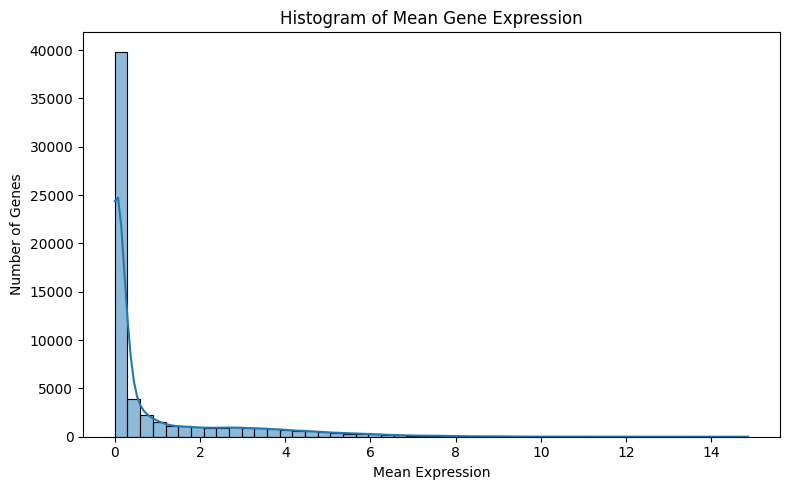

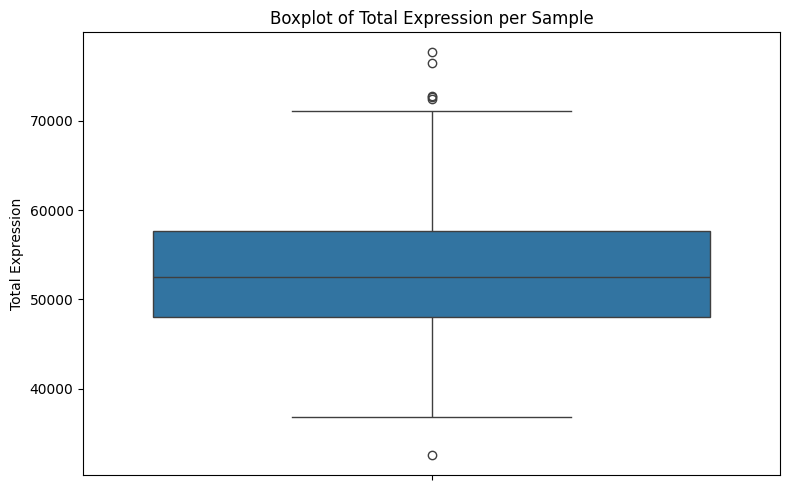

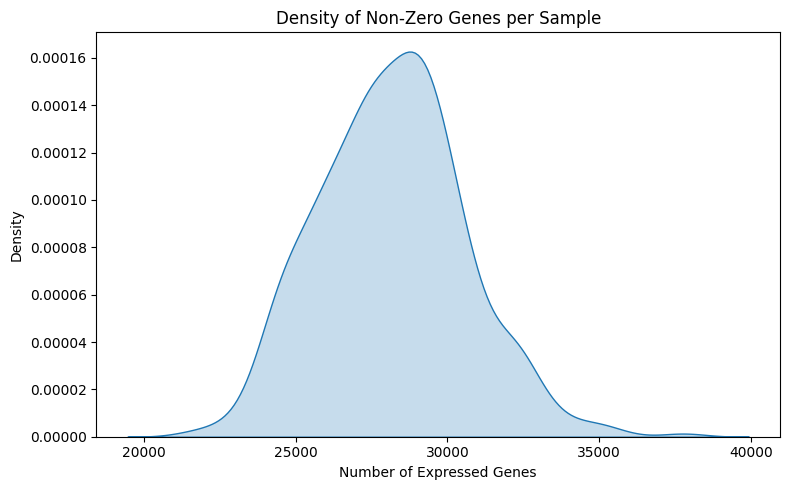

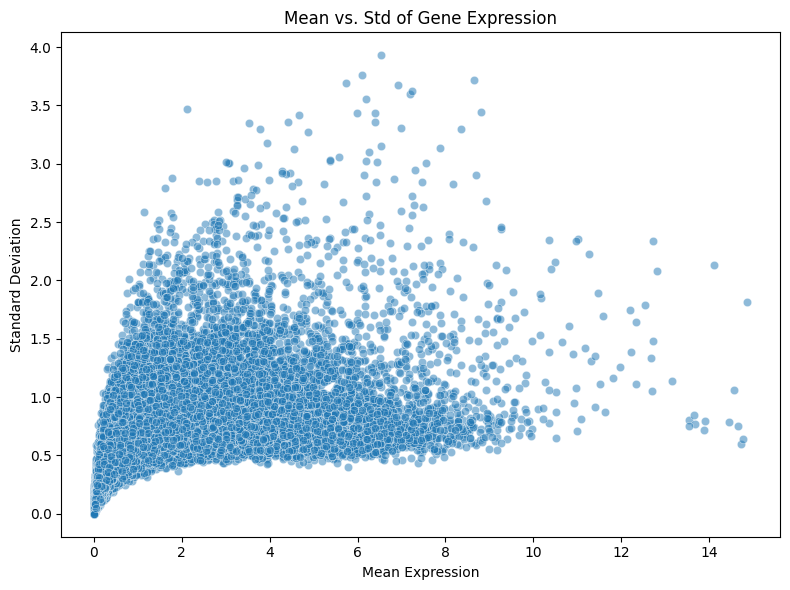

In [41]:
# Summary for genes
gene_summary = pd.DataFrame({
    'mean': genes_only.mean(),
    'std': genes_only.std()
})

# Summary for samples
sample_summary = pd.DataFrame({
    'sum_expr': genes_only.sum(axis=1),
    'mean_expr': genes_only.mean(axis=1),
    'non_zero_genes': (genes_only > 0).sum(axis=1)
})

# Histogram of Mean Gene Expression
plt.figure(figsize=(8, 5))
sns.histplot(gene_summary['mean'], bins=50, kde=True)
plt.title('Histogram of Mean Gene Expression')
plt.xlabel('Mean Expression')
plt.ylabel('Number of Genes')
plt.tight_layout()
plt.show()

# Boxplot of Total Expression per Sample
plt.figure(figsize=(8, 5))
sns.boxplot(y=sample_summary['sum_expr'])
plt.title('Boxplot of Total Expression per Sample')
plt.ylabel('Total Expression')
plt.tight_layout()
plt.show()

# Density Plot of Number of Non-Zero Genes per Sample
plt.figure(figsize=(8, 5))
sns.kdeplot(sample_summary['non_zero_genes'], fill=True)
plt.title('Density of Non-Zero Genes per Sample')
plt.xlabel('Number of Expressed Genes')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Scatterplot of Mean vs. Standard Deviation for Genes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=gene_summary, x='mean', y='std', alpha=0.5)
plt.title('Mean vs. Std of Gene Expression')
plt.xlabel('Mean Expression')
plt.ylabel('Standard Deviation')
plt.tight_layout()
plt.show()


MISSING VALUES

state.annotations                                            396
case_submitter_id.annotations                                396
category.annotations                                         396
case_id.annotations                                          396
updated_datetime.annotations                                 396
entity_type.annotations                                      396
annotation_id.annotations                                    396
created_datetime.annotations                                 396
entity_id.annotations                                        396
classification.annotations                                   396
submitter_id.annotations                                     396
notes.annotations                                            396
entity_submitter_id.annotations                              396
status.annotations                                           396
year_of_death.demographic                                    301
days_to_death.demographic

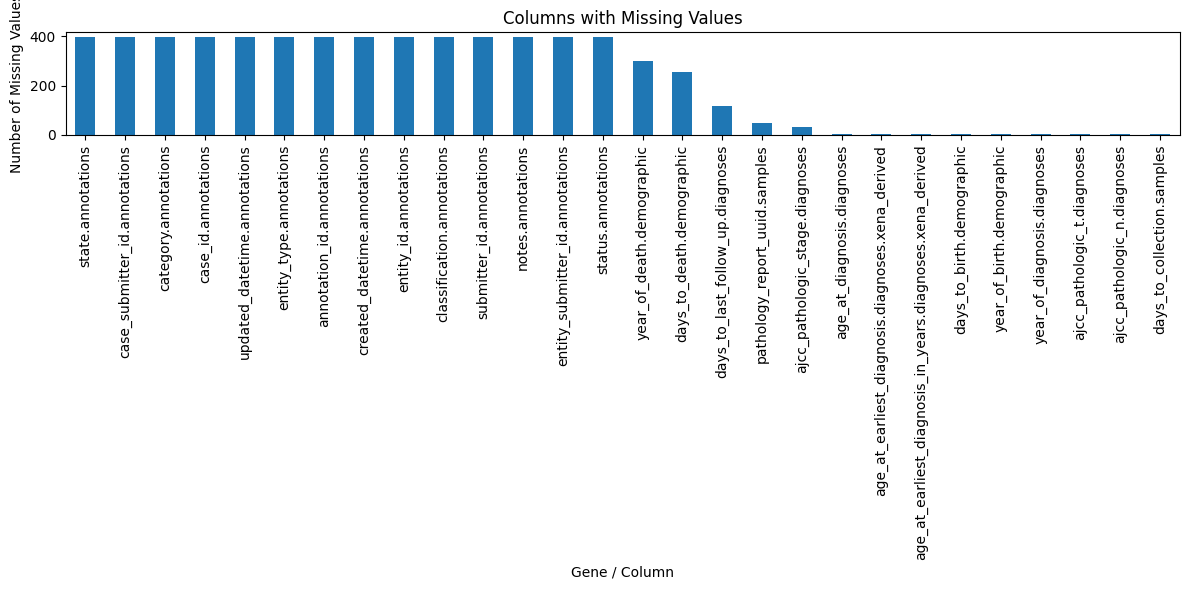

In [42]:
# Get missing value counts per column
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0]

# Sort missing values in descending order (optional)
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

# Plot the missing values counts per column
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title("Columns with Missing Values")
plt.ylabel("Number of Missing Values")
plt.xlabel("Gene / Column")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# ---------------------------
# 2. Drop Unnecessary Columns
# ---------------------------

# Drop all columns that end with '.annotations'
liver_combined_df = liver_combined_df.drop(
    columns=[col for col in liver_combined_df.columns if col.endswith('.annotations')]
)

# Drop ID-like columns (those containing 'uuid', 'submitter_id', 'entity_', or 'case_id')
id_like_cols = [
    col for col in liver_combined_df.columns 
    if 'uuid' in col or 'submitter_id' in col or 'entity_' in col or 'case_id' in col
]
liver_combined_df = liver_combined_df.drop(columns=id_like_cols)



In [44]:
# ---------------------------
# 3. Process 'days_to_death.demographic'
# ---------------------------

# Count the number of zeros in the 'days_to_death.demographic' column
zero_count = (liver_combined_df['days_to_death.demographic'] == 0).sum()
print(f"Number of zeros in 'days_to_death.demographic': {zero_count}")

# Check for null values in 'days_to_death.demographic' where patients are marked as 'Alive'
null_and_alive = liver_combined_df[
    liver_combined_df['days_to_death.demographic'].isnull() & 
    (liver_combined_df['vital_status.demographic'] == 'Alive')
]
null_and_alive_count = null_and_alive.shape[0]
print(f"Number of null values in 'days_to_death.demographic' corresponding to 'Alive': {null_and_alive_count}")

# Fill null values in 'days_to_death.demographic' with 0 for patients who are alive
liver_combined_df.loc[
    liver_combined_df['days_to_death.demographic'].isnull() & 
    (liver_combined_df['vital_status.demographic'] == 'Alive'),
    'days_to_death.demographic'
] = 0


Number of zeros in 'days_to_death.demographic': 0
Number of null values in 'days_to_death.demographic' corresponding to 'Alive': 252



# 4. Missing Values 


In [45]:
# Get updated missing value counts per column after the fill
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

year_of_death.demographic                                    301
days_to_last_follow_up.diagnoses                             119
ajcc_pathologic_stage.diagnoses                               32
days_to_birth.demographic                                      5
age_at_diagnosis.diagnoses                                     5
age_at_earliest_diagnosis.diagnoses.xena_derived               5
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived      5
year_of_birth.demographic                                      2
days_to_death.demographic                                      2
year_of_diagnosis.diagnoses                                    2
ajcc_pathologic_t.diagnoses                                    2
ajcc_pathologic_n.diagnoses                                    2
days_to_collection.samples                                     2
dtype: int64


In [46]:
cols_to_drop = ['year_of_death.demographic']
liver_combined_df = liver_combined_df.drop(columns=cols_to_drop)

# Check for missing values again        
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

days_to_last_follow_up.diagnoses                             119
ajcc_pathologic_stage.diagnoses                               32
days_to_birth.demographic                                      5
age_at_diagnosis.diagnoses                                     5
age_at_earliest_diagnosis.diagnoses.xena_derived               5
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived      5
year_of_birth.demographic                                      2
days_to_death.demographic                                      2
year_of_diagnosis.diagnoses                                    2
ajcc_pathologic_t.diagnoses                                    2
ajcc_pathologic_n.diagnoses                                    2
days_to_collection.samples                                     2
dtype: int64


In [47]:
liver_combined_df = liver_combined_df.drop(columns=[
    'days_to_last_follow_up.diagnoses',
    'days_to_birth.demographic'
])


In [48]:
# Create a DataFrame without columns that start with 'ENSG'
no_gene_liver_df = liver_combined_df.loc[:, ~liver_combined_df.columns.str.startswith('ENSG')]
no_gene_liver_df.head()

,sample,OS.time,OS,_PATIENT,id,disease_type,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,...,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-5R-AA1C-01A,520.0,0,TCGA-5R-AA1C,290890eb-321c-45dc-9cd1-45676c6e5e96,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,white,male,...,59c12b57-2eea-4f8b-bbd7-6e504c1034d6,Primary Tumor,Not Reported,60.0,750.0,Unknown,False,Solid Tissue,False,Tumor
1,TCGA-ED-A66Y-01A,296.0,1,TCGA-ED-A66Y,34303cdd-c31c-4b95-9965-2a5513dc322d,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,female,...,bc90ead3-1a92-49c8-9d97-ef4a8751833a,Primary Tumor,Not Reported,75.0,1670.0,OCT,True,Solid Tissue,False,Tumor
2,TCGA-DD-AAEI-01A,1531.0,0,TCGA-DD-AAEI,34416be6-b6d6-4029-b899-9ba685e39590,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,male,...,dcc6d13a-31e3-495a-8d63-5c897fc3c4a0,Primary Tumor,Not Reported,1238.0,10.0,OCT,True,Solid Tissue,False,Tumor
3,TCGA-ED-A8O5-01A,406.0,0,TCGA-ED-A8O5,2bea076b-c923-4a91-a37b-c6615fec021c,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,female,...,384d3f50-c931-45e4-bd65-bcfed8e1c602,Primary Tumor,Not Reported,100.0,950.0,OCT,True,Solid Tissue,False,Tumor
4,TCGA-DD-A3A2-11A,2131.0,1,TCGA-DD-A3A2,357c1c08-f368-4cae-8f20-9be241b30479,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,white,female,...,b25d09df-dc59-4a79-8e1b-38e525232901,Solid Tissue Normal,Not Reported,4962.0,160.0,Unknown,False,Solid Tissue,False,Normal


In [49]:
#let's impute age_at_diagnosis.diagnoses with age_at_earliest_diagnosis_in_years.diagnoses.xena_derived
liver_combined_df['age_at_diagnosis.diagnoses'] = liver_combined_df['age_at_diagnosis.diagnoses'].fillna(
    liver_combined_df['age_at_index.demographic']
)
# Check for missing values in 'age_at_diagnosis.diagnoses' after imputation     
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

ajcc_pathologic_stage.diagnoses                              32
age_at_earliest_diagnosis.diagnoses.xena_derived              5
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived     5
year_of_birth.demographic                                     2
days_to_death.demographic                                     2
year_of_diagnosis.diagnoses                                   2
ajcc_pathologic_t.diagnoses                                   2
ajcc_pathologic_n.diagnoses                                   2
days_to_collection.samples                                    2
dtype: int64


In [50]:
#let's impute age_at_diagnosis.diagnoses with age_at_earliest_diagnosis_in_years.diagnoses.xena_derived
liver_combined_df['age_at_earliest_diagnosis.diagnoses.xena_derived'] = liver_combined_df['age_at_earliest_diagnosis.diagnoses.xena_derived'].fillna(
    liver_combined_df['age_at_index.demographic']
)
liver_combined_df['age_at_earliest_diagnosis_in_years.diagnoses.xena_derived'] = liver_combined_df['age_at_earliest_diagnosis_in_years.diagnoses.xena_derived'].fillna(
    liver_combined_df['age_at_index.demographic']
)

# Check for missing values in 'age_at_diagnosis.diagnoses' after imputation     
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

ajcc_pathologic_stage.diagnoses    32
year_of_birth.demographic           2
days_to_death.demographic           2
year_of_diagnosis.diagnoses         2
ajcc_pathologic_t.diagnoses         2
ajcc_pathologic_n.diagnoses         2
days_to_collection.samples          2
dtype: int64


In [51]:
# Step 1: Define your inference function
def infer_pathologic_stage(row):
    t = row['ajcc_pathologic_t.diagnoses']
    n = row['ajcc_pathologic_n.diagnoses']
    m = row['ajcc_pathologic_m.diagnoses']

    # If any of the components are missing, return NaN
    if pd.isna(t) or pd.isna(n) or pd.isna(m):
        return np.nan

    # Stage IV: metastatic
    if m == 'M1':
        return 'Stage IV'

    # Basic rule-based inference (you can customize these)
    if t == 'T1' and n == 'N0':
        return 'Stage I'
    elif t in ['T1', 'T2'] and n in ['N0', 'N1']:
        return 'Stage II'
    elif t in ['T2', 'T3'] and n in ['N1', 'N2']:
        return 'Stage III'
    elif n in ['N2', 'N3']:
        return 'Stage III'
    else:
        return 'Unknown'

# Step 2: Apply only where stage is missing
mask = liver_combined_df['ajcc_pathologic_stage.diagnoses'].isna()

liver_combined_df.loc[mask, 'ajcc_pathologic_stage.diagnoses'] = liver_combined_df[mask].apply(
    infer_pathologic_stage, axis=1
)

# Check for missing values in 'age_at_diagnosis.diagnoses' after imputation     
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

year_of_birth.demographic          2
days_to_death.demographic          2
year_of_diagnosis.diagnoses        2
ajcc_pathologic_t.diagnoses        2
ajcc_pathologic_n.diagnoses        2
days_to_collection.samples         2
ajcc_pathologic_stage.diagnoses    1
dtype: int64


In [52]:
liver_combined_df[['year_of_birth.demographic', 'age_at_index.demographic', 'year_of_diagnosis.diagnoses']].head()

,year_of_birth.demographic,age_at_index.demographic,year_of_diagnosis.diagnoses
0,1956.0,57.0,2013.0
1,1962.0,51.0,2013.0
2,1938.0,72.0,2010.0
3,1954.0,59.0,2013.0
4,1922.0,76.0,1998.0


In [53]:
# Impute missing year_of_birth using age_at_index
liver_combined_df['year_of_birth.demographic'] = liver_combined_df['year_of_birth.demographic'].fillna(
    2010 - liver_combined_df['age_at_index.demographic']
)
liver_combined_df['year_of_diagnosis.diagnoses'] = liver_combined_df['year_of_diagnosis.diagnoses'].fillna(2009)
median_days = liver_combined_df['days_to_collection.samples'].median()

liver_combined_df['days_to_collection.samples'] = liver_combined_df['days_to_collection.samples'].fillna(median_days)


In [54]:
no_gene_liver_df = no_gene_liver_df.loc[:, ~no_gene_liver_df.columns.str.startswith('ENSG')]
no_gene_liver_df.head()

,sample,OS.time,OS,_PATIENT,id,disease_type,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,...,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-5R-AA1C-01A,520.0,0,TCGA-5R-AA1C,290890eb-321c-45dc-9cd1-45676c6e5e96,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,white,male,...,59c12b57-2eea-4f8b-bbd7-6e504c1034d6,Primary Tumor,Not Reported,60.0,750.0,Unknown,False,Solid Tissue,False,Tumor
1,TCGA-ED-A66Y-01A,296.0,1,TCGA-ED-A66Y,34303cdd-c31c-4b95-9965-2a5513dc322d,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,female,...,bc90ead3-1a92-49c8-9d97-ef4a8751833a,Primary Tumor,Not Reported,75.0,1670.0,OCT,True,Solid Tissue,False,Tumor
2,TCGA-DD-AAEI-01A,1531.0,0,TCGA-DD-AAEI,34416be6-b6d6-4029-b899-9ba685e39590,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,male,...,dcc6d13a-31e3-495a-8d63-5c897fc3c4a0,Primary Tumor,Not Reported,1238.0,10.0,OCT,True,Solid Tissue,False,Tumor
3,TCGA-ED-A8O5-01A,406.0,0,TCGA-ED-A8O5,2bea076b-c923-4a91-a37b-c6615fec021c,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,female,...,384d3f50-c931-45e4-bd65-bcfed8e1c602,Primary Tumor,Not Reported,100.0,950.0,OCT,True,Solid Tissue,False,Tumor
4,TCGA-DD-A3A2-11A,2131.0,1,TCGA-DD-A3A2,357c1c08-f368-4cae-8f20-9be241b30479,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,white,female,...,b25d09df-dc59-4a79-8e1b-38e525232901,Solid Tissue Normal,Not Reported,4962.0,160.0,Unknown,False,Solid Tissue,False,Normal


In [55]:
missing_death_rows = no_gene_liver_df[no_gene_liver_df['days_to_death.demographic'].isna()]
print(missing_death_rows)
#we see she is dead so we put zero
#let's fill the missing values in 'days_to_death.demographic' with 0 for patients who are dead
no_gene_liver_df.loc[
    no_gene_liver_df['days_to_death.demographic'].isna() & 
    (no_gene_liver_df['vital_status.demographic'] == 'Dead'),
    'days_to_death.demographic'
] = 0

               sample  OS.time  OS      _PATIENT                                    id                  disease_type                       primary_site alcohol_history.exposures           race.demographic gender.demographic  ...                     sample_id.samples  sample_type.samples  composition.samples  days_to_collection.samples initial_weight.samples preservation_method.samples oct_embedded.samples specimen_type.samples is_ffpe.samples tissue_type.samples
102  TCGA-DD-A11A-11A     79.0   1  TCGA-DD-A11A  609c82fd-eb3a-46d7-8c09-0cde281a50b3  Adenomas and Adenocarcinomas  Liver and intrahepatic bile ducts              Not Reported  black or african american               male  ...  0cfc44e7-7450-4815-ac7c-414003a7d6df  Solid Tissue Normal         Not Reported                      2184.0                  240.0                     Unknown                False          Solid Tissue           False              Normal
201  TCGA-DD-A11A-01A     79.0   1  TCGA-DD-A11A  609c82fd-eb3a-46

In [56]:
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

days_to_death.demographic          2
ajcc_pathologic_t.diagnoses        2
ajcc_pathologic_n.diagnoses        2
ajcc_pathologic_stage.diagnoses    1
dtype: int64


In [57]:
# Handle null values in 'days_to_death.demographic'
# Fill missing values with 0 for patients who are alive
liver_combined_df['days_to_death.demographic'] = liver_combined_df['days_to_death.demographic'].fillna(0)

# Handle null values in 'ajcc_pathologic_t.diagnoses' and 'ajcc_pathologic_n.diagnoses'
# Fill missing values with 'Missing'
liver_combined_df['ajcc_pathologic_t.diagnoses'] = liver_combined_df['ajcc_pathologic_t.diagnoses'].fillna('Missing')
liver_combined_df['ajcc_pathologic_n.diagnoses'] = liver_combined_df['ajcc_pathologic_n.diagnoses'].fillna('Missing')

# Handle null values in 'ajcc_pathologic_stage.diagnoses'
# Fill missing values with 'Missing'
liver_combined_df['ajcc_pathologic_stage.diagnoses'] = liver_combined_df['ajcc_pathologic_stage.diagnoses'].fillna('Missing')

In [58]:
missing_values = liver_combined_df.isna().sum()
missing_values = missing_values[missing_values > 0] 
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

Series([], dtype: int64)


----------------------------------------

Now we need to transform the categorical variables

In [59]:
no_gene_liver_df = liver_combined_df.loc[:, ~liver_combined_df.columns.str.startswith('ENSG')]
no_gene_liver_df.head()

,sample,OS.time,OS,_PATIENT,id,disease_type,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,...,sample_id.samples,sample_type.samples,composition.samples,days_to_collection.samples,initial_weight.samples,preservation_method.samples,oct_embedded.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples
0,TCGA-5R-AA1C-01A,520.0,0,TCGA-5R-AA1C,290890eb-321c-45dc-9cd1-45676c6e5e96,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,white,male,...,59c12b57-2eea-4f8b-bbd7-6e504c1034d6,Primary Tumor,Not Reported,60.0,750.0,Unknown,False,Solid Tissue,False,Tumor
1,TCGA-ED-A66Y-01A,296.0,1,TCGA-ED-A66Y,34303cdd-c31c-4b95-9965-2a5513dc322d,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,female,...,bc90ead3-1a92-49c8-9d97-ef4a8751833a,Primary Tumor,Not Reported,75.0,1670.0,OCT,True,Solid Tissue,False,Tumor
2,TCGA-DD-AAEI-01A,1531.0,0,TCGA-DD-AAEI,34416be6-b6d6-4029-b899-9ba685e39590,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,male,...,dcc6d13a-31e3-495a-8d63-5c897fc3c4a0,Primary Tumor,Not Reported,1238.0,10.0,OCT,True,Solid Tissue,False,Tumor
3,TCGA-ED-A8O5-01A,406.0,0,TCGA-ED-A8O5,2bea076b-c923-4a91-a37b-c6615fec021c,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,asian,female,...,384d3f50-c931-45e4-bd65-bcfed8e1c602,Primary Tumor,Not Reported,100.0,950.0,OCT,True,Solid Tissue,False,Tumor
4,TCGA-DD-A3A2-11A,2131.0,1,TCGA-DD-A3A2,357c1c08-f368-4cae-8f20-9be241b30479,Adenomas and Adenocarcinomas,Liver and intrahepatic bile ducts,Not Reported,white,female,...,b25d09df-dc59-4a79-8e1b-38e525232901,Solid Tissue Normal,Not Reported,4962.0,160.0,Unknown,False,Solid Tissue,False,Normal


We drop the columns that are not needed: sample, _PATIENT, id, primary_site, alcohol_history.exposures, gender.demographic, primary_site.project, project_id.project, disease_type.project, name.project, name.program.project, project.tissue_source_site, bcr_id.tissue_source_site, days_to_diagnosis.diagnoses, last_known_disease_status.diagnoses, age_at_diagnosis.diagnoses, morphology.diagnoses, classification_of_tumor.diagnoses, icd_10_code.diagnoses, site_of_resection_or_biopsy.diagnoses, tumor_grade.diagnoses, progression_or_recurrence.diagnoses, age_at_earliest_diagnosis.diagnoses.xena_derived, treatment_id.treatments.diagnoses, treatment_type.treatments.diagnoses, created_datetime.treatments.diagnoses, updated_datetime.treatments.diagnoses, state.treatments.diagnoses, sample_id.samples, composition.samples, preservation_method.samples, specimen_type.samples, 


dropping but to reconsdier tissue_source_site_id.tis, code.tissue_source_site, name.tissue_source_site, tissue_or_organ_of_origin.diagnoses, primary_diagnosis.diagnoses, ajcc_staging_system_edition.diagnoses, sample_type_id.samples


dont know what to do ajcc_pathologic_stage.diagnoses: is it our y??

In [60]:
columns_to_drop = [
    'sample', '_PATIENT', 'id', 'primary_site', 'alcohol_history.exposures', 'gender.demographic',
    'primary_site.project', 'project_id.project', 'disease_type.project', 'name.project',
    'name.program.project', 'project.tissue_source_site', 'bcr_id.tissue_source_site',
    'days_to_diagnosis.diagnoses', 'last_known_disease_status.diagnoses',
    'age_at_diagnosis.diagnoses', 'morphology.diagnoses',
    'classification_of_tumor.diagnoses', 'icd_10_code.diagnoses',
    'site_of_resection_or_biopsy.diagnoses', 'tumor_grade.diagnoses',
    'progression_or_recurrence.diagnoses',
    'age_at_earliest_diagnosis.diagnoses.xena_derived', 'treatment_id.treatments.diagnoses',
    'treatment_type.treatments.diagnoses', 'created_datetime.treatments.diagnoses',
    'updated_datetime.treatments.diagnoses', 'state.treatments.diagnoses',
    'sample_id.samples', 'composition.samples', 'preservation_method.samples',
    'specimen_type.samples', 'tissue_source_site_id.tis', 'code.tissue_source_site',
    'name.tissue_source_site', 'tissue_or_organ_of_origin.diagnoses',
    'primary_diagnosis.diagnoses', 'ajcc_staging_system_edition.diagnoses',
    'sample_type_id.samples', 'tissue_source_site_id.tissue_source_site'
]

# Drop only columns that exist in the dataframe
liver_combined_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [61]:
liver_combined_df['disease_type'].unique()

array(['Adenomas and Adenocarcinomas'], dtype=object)

Unlike for breast cancer, where we have 9 different disease types, we have only one disease type for our liver cancer dataset. i'm mimicking the structure of the breast dataset, but we'll only have one column with all variables being 1.

is this to be expected?

In [62]:
#disease_type is almost binary, so we do Binary Encoding
# Binary encode: 1 if 'Adenomas and Adenocarcinomas'', else 0
liver_combined_df['is_adenomas_and_adenocarcinomas'] = (
    liver_combined_df['disease_type'] == 'Adenomas and Adenocarcinomas'
).astype(int)

# Drop the original column
liver_combined_df = liver_combined_df.drop(columns=['disease_type'])


In [63]:
# One-hot encode race.demographic
race_dummies = pd.get_dummies(liver_combined_df['race.demographic'], prefix='race', drop_first=True)

# Concatenate the new dummy columns
liver_combined_df = pd.concat([liver_combined_df, race_dummies], axis=1)

# Drop the original column
liver_combined_df = liver_combined_df.drop(columns=['race.demographic'])


In [64]:
# one hot encoding of ethnicity.demographic
# One-hot encode with drop_first=True
ethnicity_dummies = pd.get_dummies(liver_combined_df['ethnicity.demographic'], 
                                    prefix='ethnicity', 
                                    drop_first=True)

# Add the new columns to the DataFrame
liver_combined_df = pd.concat([liver_combined_df, ethnicity_dummies], axis=1)

# Drop the original column
liver_combined_df = liver_combined_df.drop(columns=['ethnicity.demographic'])


In [65]:
liver_combined_df['vital_status.demographic'].unique()

array(['Alive', 'Dead', 'Not Reported'], dtype=object)

In [66]:
# Binary encode: 1 if 'Alive', 0 if 'Dead'
liver_combined_df['is_alive'] = (
    liver_combined_df['vital_status.demographic'] == 'Alive'
).astype(int)

# Drop the original column
liver_combined_df.drop(columns=['vital_status.demographic'], inplace=True)


In [67]:
liver_combined_df['synchronous_malignancy.diagnoses'].unique()

array(['No', 'Not Reported'], dtype=object)

In [68]:
# Binary encode: 1 if 'Not Reported', 0 if 'No'
liver_combined_df['synchronous_malignancy_reported'] = (
    liver_combined_df['synchronous_malignancy.diagnoses'] == 'Not Reported'
).astype(int)

# Drop the original column
liver_combined_df = liver_combined_df.drop(columns=['synchronous_malignancy.diagnoses'])


In [69]:
liver_combined_df['prior_malignancy.diagnoses'].unique()

array(['no', 'yes'], dtype=object)

In [70]:
def encode_prior_malignancy(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return -1  # or use -1 if your model supports it

liver_combined_df['prior_malignancy_encoded'] = liver_combined_df['prior_malignancy.diagnoses'].apply(encode_prior_malignancy)
liver_combined_df = liver_combined_df.drop(columns=['prior_malignancy.diagnoses'])


In [71]:
liver_combined_df['prior_treatment.diagnoses'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
def encode_prior_treatment(value):
    if value == 'Yes':
        return 1
    elif value == 'No':
        return 0
    else:
        return -1

liver_combined_df['prior_treatment_encoded'] = liver_combined_df['prior_treatment.diagnoses'].apply(encode_prior_treatment)

# Drop the original column
liver_combined_df = liver_combined_df.drop(columns=['prior_treatment.diagnoses'])


In [73]:
liver_combined_df['ajcc_pathologic_t.diagnoses'].unique()

array(['T2', 'T3a', 'T1', 'T4', 'T3b', 'T3', 'T2a', 'Missing', 'T2b',
       'TX'], dtype=object)

In [74]:
liver_combined_df['ajcc_pathologic_n.diagnoses'].value_counts()

ajcc_pathologic_n.diagnoses
N0         281
NX         130
N1           5
Missing      2
Name: count, dtype: int64

In [75]:
liver_combined_df['ajcc_pathologic_m.diagnoses'].value_counts()

ajcc_pathologic_m.diagnoses
M0    298
MX    116
M1      4
Name: count, dtype: int64

NOTE: THE N AND M VALUES HAVE SOME DIFFERENCES BETWEEN THE BREAST AND LIVER CANCER DATASETS IN THE VALUE TYPES/STRUCTURES

In [76]:
# we try to encode them together ajcc_pathologic_t.diagnoses, ajcc_pathologic_n.diagnoses, ajcc_pathologic_m.diagnoses
def simplify_t(value):
    if pd.isna(value): return 'Unknown'
    if value.startswith('T1'): return 'T1'
    if value.startswith('T2'): return 'T2'
    if value.startswith('T3'): return 'T3'
    if value.startswith('T4'): return 'T4'
    return value  # keep T0, TX, etc.

liver_combined_df['T_grouped'] = liver_combined_df['ajcc_pathologic_t.diagnoses'].apply(simplify_t)

def simplify_n(value):
    if pd.isna(value) or value == 'Missing': return 'Unknown'
    if value.startswith('N0'): return 'N0'
    if value.startswith('N1'): return 'N1'
    return value

liver_combined_df['N_grouped'] = liver_combined_df['ajcc_pathologic_n.diagnoses'].apply(simplify_n)

#structure is a bit different than the breast cancer dataset
def simplify_m(value):
    if pd.isna(value) or value == 'Missing': return 'Unknown'
    if value == 'M0': return 'M0'
    if value == 'M1': return 'M1'
    return 'Other'

liver_combined_df['M_grouped'] = liver_combined_df['ajcc_pathologic_m.diagnoses'].apply(simplify_m)

tmn_dummies = pd.get_dummies(
    liver_combined_df[['T_grouped', 'N_grouped', 'M_grouped']], 
    drop_first=True
)

# Add to df and drop originals
liver_combined_df = pd.concat([liver_combined_df, tmn_dummies], axis=1)
liver_combined_df = liver_combined_df.drop(columns=[
    'ajcc_pathologic_t.diagnoses',
    'ajcc_pathologic_n.diagnoses',
    'ajcc_pathologic_m.diagnoses',
    'T_grouped', 'N_grouped', 'M_grouped'
])


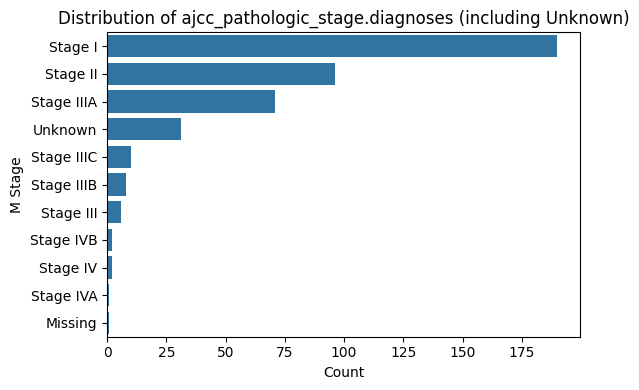

In [77]:
# Plot AJCC Pathologic Stage (ordinal categorical)
plt.figure(figsize=(6, 4))
sns.countplot(
    y=liver_combined_df['ajcc_pathologic_stage.diagnoses'].fillna('Unknown'),
    order=liver_combined_df['ajcc_pathologic_stage.diagnoses'].fillna('Unknown').value_counts().index
)
plt.title("Distribution of ajcc_pathologic_stage.diagnoses (including Unknown)")
plt.xlabel("Count")
plt.ylabel("M Stage")
plt.tight_layout()
plt.show()

In [78]:
liver_combined_df = liver_combined_df[~liver_combined_df['ajcc_pathologic_stage.diagnoses'].isin(['Unknown', 'Missing'])]


In [79]:
# Step 1: Convert string representations of lists to actual Python lists
liver_combined_df['treatment_or_therapy.treatments.diagnoses'] = liver_combined_df['treatment_or_therapy.treatments.diagnoses'].apply(ast.literal_eval)

# Step 2: Split into two new columns
liver_combined_df[['treatment_flag', 'diagnosis_flag']] = pd.DataFrame(
    liver_combined_df['treatment_or_therapy.treatments.diagnoses'].tolist(),
    index=liver_combined_df.index
)

# Step 3: Map values: 'yes' → 1, 'no' → 0, 'not reported' → -1
mapping = {'yes': 1, 'no': 0, 'not reported': -1}

liver_combined_df['treatment_flag_encoded'] = liver_combined_df['treatment_flag'].map(mapping)
liver_combined_df['diagnosis_flag_encoded'] = liver_combined_df['diagnosis_flag'].map(mapping)

# Drop original column if not needed
liver_combined_df.drop(columns=['treatment_or_therapy.treatments.diagnoses'], inplace=True)


In [80]:
# Mapping categories to numeric values
mapping = {'yes': 1, 'no': 0, 'not reported': -1}

# Apply mapping
liver_combined_df['treatment_flag'] = liver_combined_df['treatment_flag'].map(mapping)
liver_combined_df['diagnosis_flag'] = liver_combined_df['diagnosis_flag'].map(mapping)


In [81]:
# One-hot encode the 'tumor_descriptor.samples' column
tumor_dummies = pd.get_dummies(
    liver_combined_df['tumor_descriptor.samples'],
    prefix='tumor_sample',
    drop_first=True
)

# Concatenate the new columns with the original DataFrame
liver_combined_df = pd.concat([liver_combined_df, tumor_dummies], axis=1)

# Drop the original column if no longer needed
liver_combined_df.drop(columns=['tumor_descriptor.samples'], inplace=True)


In [82]:
# One-hot encode the 'sample_type.samples' column with drop_first=True
sample_type_dummies = pd.get_dummies(
    liver_combined_df['sample_type.samples'],
    prefix='sample_type',
    drop_first=True
)

# Concatenate the new dummy columns to the original DataFrame
liver_combined_df = pd.concat([liver_combined_df, sample_type_dummies], axis=1)

# Drop the original 'sample_type.samples' column
liver_combined_df.drop(columns=['sample_type.samples'], inplace=True)


In [83]:
# Convert boolean to int and store in a new column
liver_combined_df['oct_embedded_encoded'] = liver_combined_df['oct_embedded.samples'].astype(int)

# Drop the original column
liver_combined_df.drop(columns=['oct_embedded.samples'], inplace=True)


In [84]:
# Convert True/False to 1/0
liver_combined_df['is_ffpe_encoded'] = liver_combined_df['is_ffpe.samples'].astype(int)

# Drop the original column
liver_combined_df.drop(columns=['is_ffpe.samples'], inplace=True)


In [85]:
# One-hot encode 'tissue_type.samples' and drop the first category
tissue_type_dummies = pd.get_dummies(
    liver_combined_df['tissue_type.samples'],
    prefix='tissue_type',
    drop_first=True
)

# Concatenate the new dummy column to the DataFrame
liver_combined_df = pd.concat([liver_combined_df, tissue_type_dummies], axis=1)

# Drop the original column
liver_combined_df.drop(columns=['tissue_type.samples'], inplace=True)


In [88]:
# Check for non-numeric columns
non_numeric_columns = liver_combined_df.select_dtypes(exclude=['number']).columns
print("\nNon-numeric (categorical or object) columns:")
print(non_numeric_columns.tolist())



Non-numeric (categorical or object) columns:
['ajcc_pathologic_stage.diagnoses', 'race_asian', 'race_black or african american', 'race_not reported', 'race_white', 'ethnicity_not hispanic or latino', 'ethnicity_not reported', 'T_grouped_T1', 'T_grouped_T2', 'T_grouped_T3', 'T_grouped_T4', 'T_grouped_TX', 'N_grouped_N1', 'N_grouped_NX', 'N_grouped_Unknown', 'M_grouped_M1', 'M_grouped_Other', 'tumor_sample_Primary', 'tumor_sample_Recurrence', 'sample_type_Recurrent Tumor', 'sample_type_Solid Tissue Normal', 'tissue_type_Tumor']


In [89]:
cols_to_convert = ['race_asian', 'race_black or african american', 'race_not reported', 
                   'race_white', 'ethnicity_not hispanic or latino', 'ethnicity_not reported', 
                   'T_grouped_T1', 'T_grouped_T2', 'T_grouped_T3', 'T_grouped_T4', 'T_grouped_TX',
                   'N_grouped_N1', 'N_grouped_NX', 'N_grouped_Unknown', 'M_grouped_M1', 'M_grouped_Other', 
                   'tumor_sample_Primary', 'tumor_sample_Recurrence', 
                   'sample_type_Recurrent Tumor', 'sample_type_Solid Tissue Normal', 
                   'tissue_type_Tumor']

# Convert True/False to 1/0
liver_combined_df[cols_to_convert] = liver_combined_df[cols_to_convert].astype(int)
liver_combined_df

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,diagnosis_flag,treatment_flag_encoded,diagnosis_flag_encoded,tumor_sample_Primary,tumor_sample_Recurrence,sample_type_Recurrent Tumor,sample_type_Solid Tissue Normal,oct_embedded_encoded,is_ffpe_encoded,tissue_type_Tumor
0,6.863447,0.254836,6.909411,3.362007,4.462321,1.206081,9.331555,4.587533,6.080406,4.053424,...,0,0,0,1,0,0,0,0,0,1
1,5.221413,0.000000,5.999260,3.694713,2.120053,1.732009,4.040410,5.958673,3.288373,4.695432,...,0,0,0,1,0,0,0,1,0,1
2,5.315668,0.051581,5.328535,1.576909,0.805045,2.100809,8.066063,6.073636,4.817429,3.307210,...,1,0,1,1,0,0,0,1,0,1
3,5.766399,0.157044,5.013636,3.533090,2.011424,1.858299,8.087634,5.112400,6.187475,5.874689,...,0,0,0,1,0,0,0,1,0,1
4,5.427251,0.264957,5.325527,1.848197,0.408821,1.858936,8.709730,4.792460,4.725567,2.206237,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,5.725351,0.856149,6.131995,2.231647,3.320701,3.260673,5.677855,7.650449,4.901721,4.498168,...,0,0,0,1,0,0,0,1,0,1
414,6.200024,0.233029,6.280329,2.514223,1.446044,1.672471,6.579489,5.476489,5.931948,3.975401,...,0,0,0,1,0,0,0,1,0,1
415,4.753011,0.000000,5.462955,2.431997,0.712111,1.837863,9.957777,5.976070,4.056306,2.658234,...,0,0,0,1,0,0,0,1,0,1
416,8.499618,0.524565,5.714644,2.142021,1.047818,1.585876,8.237070,4.103850,4.107027,3.509050,...,0,0,0,1,0,0,0,1,0,1


In [90]:
no_gene_liver_df = liver_combined_df.loc[:, ~liver_combined_df.columns.str.startswith('ENSG')]
no_gene_liver_df.head()

,OS.time,OS,age_at_index.demographic,year_of_birth.demographic,days_to_death.demographic,ajcc_pathologic_stage.diagnoses,year_of_diagnosis.diagnoses,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,days_to_collection.samples,initial_weight.samples,...,diagnosis_flag,treatment_flag_encoded,diagnosis_flag_encoded,tumor_sample_Primary,tumor_sample_Recurrence,sample_type_Recurrent Tumor,sample_type_Solid Tissue Normal,oct_embedded_encoded,is_ffpe_encoded,tissue_type_Tumor
0,520.0,0,57.0,1956.0,0.0,Stage II,2013.0,57.734247,60.0,750.0,...,0,0,0,1,0,0,0,0,0,1
1,296.0,1,51.0,1962.0,296.0,Stage IIIA,2013.0,51.498630,75.0,1670.0,...,0,0,0,1,0,0,0,1,0,1
2,1531.0,0,72.0,1938.0,0.0,Stage I,2010.0,72.506849,1238.0,10.0,...,1,0,1,1,0,0,0,1,0,1
3,406.0,0,59.0,1954.0,0.0,Stage IIIA,2013.0,59.309589,100.0,950.0,...,0,0,0,1,0,0,0,1,0,1
4,2131.0,1,76.0,1922.0,2131.0,Stage I,1998.0,76.520548,4962.0,160.0,...,0,0,0,0,0,0,1,0,0,0


-----------------------------------------

## Regression

Now we will use three variables as our y: 
1. Binary Classification: is_alive, 'Alive': 1, 'Dead': 0
2. Regression (or Ordinal Classification): ajcc_pathologic_stage.diagnoses, Stage IIA (32%), Stage IIB (24%), etc
3. Regression Continuous numerical: days_to_death

We will model the analysis first using only Gene expression variables, and then we'll analyse the full dataset

In total we'll have 6 regressions 

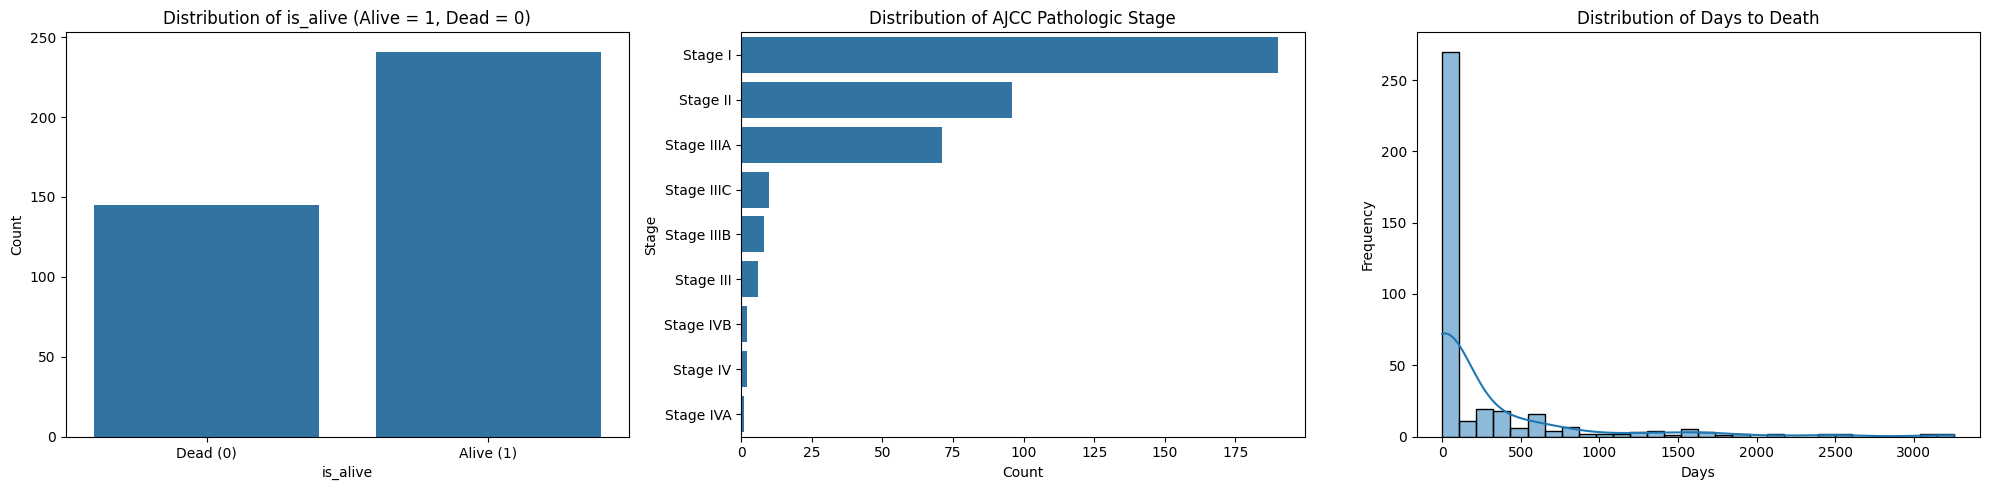

In [91]:
# Set up figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: is_alive (binary)
sns.countplot(x='is_alive', data=liver_combined_df, ax=axs[0])
axs[0].set_title('Distribution of is_alive (Alive = 1, Dead = 0)')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Dead (0)', 'Alive (1)'])
axs[0].set_ylabel('Count')

# Plot 2: AJCC Pathologic Stage (ordinal categorical)
sns.countplot(
    y='ajcc_pathologic_stage.diagnoses',
    data=liver_combined_df,
    order=liver_combined_df['ajcc_pathologic_stage.diagnoses'].value_counts().index,
    ax=axs[1]
)
axs[1].set_title('Distribution of AJCC Pathologic Stage')
axs[1].set_ylabel('Stage')
axs[1].set_xlabel('Count')

# Plot 3: Days to Death (continuous)
sns.histplot(
    liver_combined_df['days_to_death.demographic'].dropna(),
    kde=True,
    bins=30,
    ax=axs[2]
)
axs[2].set_title('Distribution of Days to Death')
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Frequency')

# Layout
plt.tight_layout()
plt.show()

## Target Variable Analysis: Distribution and Modeling Considerations

We analyze the three target variables used in our regression and classification models: `is_alive`, `ajcc_pathologic_stage.diagnoses`, and `days_to_death`. Each has different characteristics and challenges.

---

### 1. `is_alive` (Binary Classification)

**Distribution**:  
- Alive: ~1000  
- Dead: ~200  

**Issues**:
- Class imbalance can negatively affect model performance.
- A model could trivially predict "Alive" and achieve high accuracy.
- Accuracy becomes a misleading metric due to imbalance.

**Recommendations**:
- Use metrics such as AUC, F1-score, precision, and recall.
- Apply class weighting, oversampling (e.g., SMOTE), or undersampling strategies to address imbalance.

---

### 2. `ajcc_pathologic_stage.diagnoses` (Ordinal Categorical)

**Distribution**:  
- Dominated by a few stages: Stage IIA, IIB, IIIA  
- Sparse categories: Stage IB, Stage X, Unknown, etc.

**Issues**:
- The ordinal nature of the data is lost if treated as nominal (e.g., one-hot encoding).
- Rare categories may cause instability in training.
- Clinical progression between stages may not be linear.

**Recommendations**:
- Use ordinal encoding based on clinical progression (e.g., Stage I = 1, ..., Stage IV = 4).
- Consider merging rare categories.
- Explore ordinal regression models if supported by the framework.

ajcc_pathologic_t.diagnoses, n, m
These are the individual TNM components:

T = Tumor size and extent (e.g., T1, T2, T3, T4)

N = Lymph node involvement (e.g., N0, N1, N2, N3)

M = Distant metastasis (M0 = no, M1 = yes)

They provide granular staging detail, they represent part of the diagnose, so we **should consider dropping the 3 cols**

---

### 3. `days_to_death` (Continuous Regression)

**Distribution**:  
- Highly right-skewed  
- Most values are small; some extend to 7000+ days

**Issues**:
- Right-skewness violates normality assumptions in linear regression.
- Outliers may dominate loss functions.
- Alive patients are likely censored and excluded, reducing training data and introducing survival bias.

**Recommendations**:
- Apply a log transformation (e.g., `log1p`) to stabilize variance and reduce skew:
  ```python
  liver_combined_df['log_days_to_death'] = np.log1p(liver_combined_df['days_to_death'])

In [92]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Gene features
genes_only = liver_combined_df.loc[:, liver_combined_df.columns.str.startswith('ENSG')]

# ------------------------------------
# 1. is_alive — Logistic Regression (L1)
# ------------------------------------
X1 = genes_only
y1 = liver_combined_df['is_alive']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Scale and fit logistic regression with L1 penalty
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1_train)

clf1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, C=1.0)
clf1.fit(X1_scaled, y1_train)

# Get non-zero coefficients
selected_genes_1 = X1.columns[clf1.coef_[0] != 0]
print("1. Genes selected for is_alive (binary classification):")
print(selected_genes_1.tolist())


1. Genes selected for is_alive (binary classification):
['ENSG00000000005', 'ENSG00000002822', 'ENSG00000003137', 'ENSG00000004846', 'ENSG00000004866', 'ENSG00000005421', 'ENSG00000005700', 'ENSG00000006016', 'ENSG00000007038', 'ENSG00000010319', 'ENSG00000012817', 'ENSG00000015520', 'ENSG00000017483', 'ENSG00000019169', 'ENSG00000025434', 'ENSG00000036565', 'ENSG00000037965', 'ENSG00000038532', 'ENSG00000058799', 'ENSG00000060303', 'ENSG00000063660', 'ENSG00000067365', 'ENSG00000068985', 'ENSG00000069482', 'ENSG00000070087', 'ENSG00000070501', 'ENSG00000070886', 'ENSG00000071242', 'ENSG00000072062', 'ENSG00000072133', 'ENSG00000072163', 'ENSG00000075035', 'ENSG00000077009', 'ENSG00000077616', 'ENSG00000078725', 'ENSG00000079337', 'ENSG00000079432', 'ENSG00000082146', 'ENSG00000083635', 'ENSG00000084628', 'ENSG00000084754', 'ENSG00000085721', 'ENSG00000085741', 'ENSG00000087008', 'ENSG00000087237', 'ENSG00000088543', 'ENSG00000090382', 'ENSG00000090487', 'ENSG00000091106', 'ENSG0000009

let's look at model 1's (is_alive — Logistic Regression (L1)) performance

In [96]:
from sklearn.metrics import classification_report, roc_auc_score

X1_test_scaled = scaler1.transform(X1_test)
y1_pred = clf1.predict(X1_test_scaled)
y1_proba = clf1.predict_proba(X1_test_scaled)[:, 1]

print(classification_report(y1_test, y1_pred))
print("ROC AUC:", roc_auc_score(y1_test, y1_proba))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        32
           1       0.69      0.72      0.70        46

    accuracy                           0.64        78
   macro avg       0.63      0.62      0.63        78
weighted avg       0.64      0.64      0.64        78

ROC AUC: 0.6684782608695652


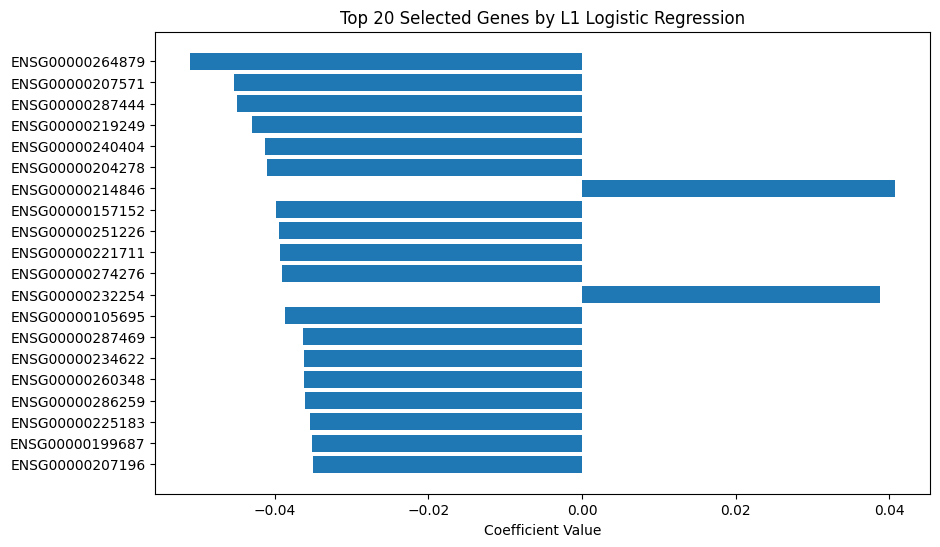

In [97]:
import matplotlib.pyplot as plt

coef = clf1.coef_[0]
top_indices = np.argsort(np.abs(coef))[-20:]
top_genes = X1.columns[top_indices]
top_values = coef[top_indices]

plt.figure(figsize=(10,6))
plt.barh(top_genes, top_values)
plt.xlabel("Coefficient Value")
plt.title("Top 20 Selected Genes by L1 Logistic Regression")
plt.show()

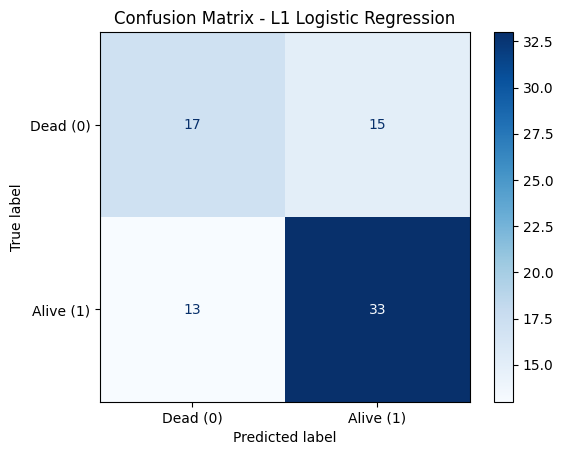

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test: true labels
# y_pred: predicted labels
cm = confusion_matrix(y1_test, y1_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dead (0)', 'Alive (1)'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix - L1 Logistic Regression")
plt.show()

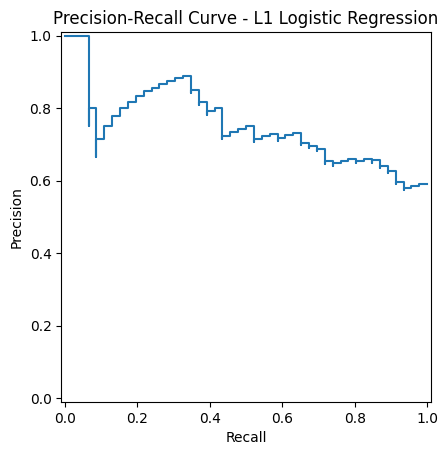

In [99]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# y_proba: predicted probabilities for class 1 (Alive)
precision, recall, _ = precision_recall_curve(y1_test, y1_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.title("Precision-Recall Curve - L1 Logistic Regression")
plt.show()

In [93]:

# ------------------------------------
# 2. ajcc_pathologic_stage.diagnoses — Ordinal regression via Lasso
# ------------------------------------
stage_order = ['Stage I', 
                'Stage II', 
                'Stage III','Stage IIIA', 'Stage IIIB', 'Stage IIIC',
                'Stage IV',  'Stage IVA', 'Stage IVB']
mask2 = liver_combined_df['ajcc_pathologic_stage.diagnoses'].isin(stage_order)

X2 = genes_only[mask2]
y2 = liver_combined_df.loc[mask2, 'ajcc_pathologic_stage.diagnoses']
y2_encoded = OrdinalEncoder(categories=[stage_order]).fit_transform(y2.values.reshape(-1, 1)).ravel()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_encoded, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2_train)

lasso2 = Lasso(alpha=0.1)
lasso2.fit(X2_scaled, y2_train)

selected_genes_2 = X2.columns[lasso2.coef_ != 0]
print("\n2. Genes selected for AJCC pathologic stage (ordinal regression):")
print(selected_genes_2.tolist())




2. Genes selected for AJCC pathologic stage (ordinal regression):
['ENSG00000101200', 'ENSG00000102109', 'ENSG00000106366', 'ENSG00000110665', 'ENSG00000117266', 'ENSG00000121089', 'ENSG00000125246', 'ENSG00000127515', 'ENSG00000130822', 'ENSG00000144290', 'ENSG00000168129', 'ENSG00000174564', 'ENSG00000174948', 'ENSG00000175482', 'ENSG00000176269', 'ENSG00000177261', 'ENSG00000178596', 'ENSG00000178919', 'ENSG00000187005', 'ENSG00000187627', 'ENSG00000197046', 'ENSG00000198680', 'ENSG00000198854', 'ENSG00000198889', 'ENSG00000199032', 'ENSG00000199381', 'ENSG00000199944', 'ENSG00000200275', 'ENSG00000200879', 'ENSG00000201182', 'ENSG00000204403', 'ENSG00000206069', 'ENSG00000206747', 'ENSG00000206812', 'ENSG00000207638', 'ENSG00000207775', 'ENSG00000210117', 'ENSG00000211713', 'ENSG00000212722', 'ENSG00000213035', 'ENSG00000213547', 'ENSG00000213653', 'ENSG00000214688', 'ENSG00000214748', 'ENSG00000215296', 'ENSG00000222743', 'ENSG00000222844', 'ENSG00000223128', 'ENSG00000224167', '


Mean Absolute Error (Ordinal Distance): 1.167

Classification Report:
              precision    recall  f1-score   support

     Stage I       0.67      0.17      0.27        35
    Stage II       0.25      0.70      0.37        20
   Stage III       0.00      0.00      0.00         0
  Stage IIIA       0.50      0.12      0.20        16
  Stage IIIB       0.00      0.00      0.00         3
  Stage IIIC       0.00      0.00      0.00         2
    Stage IV       0.00      0.00      0.00         1
   Stage IVB       0.00      0.00      0.00         1

    accuracy                           0.28        78
   macro avg       0.18      0.12      0.11        78
weighted avg       0.47      0.28      0.26        78



/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

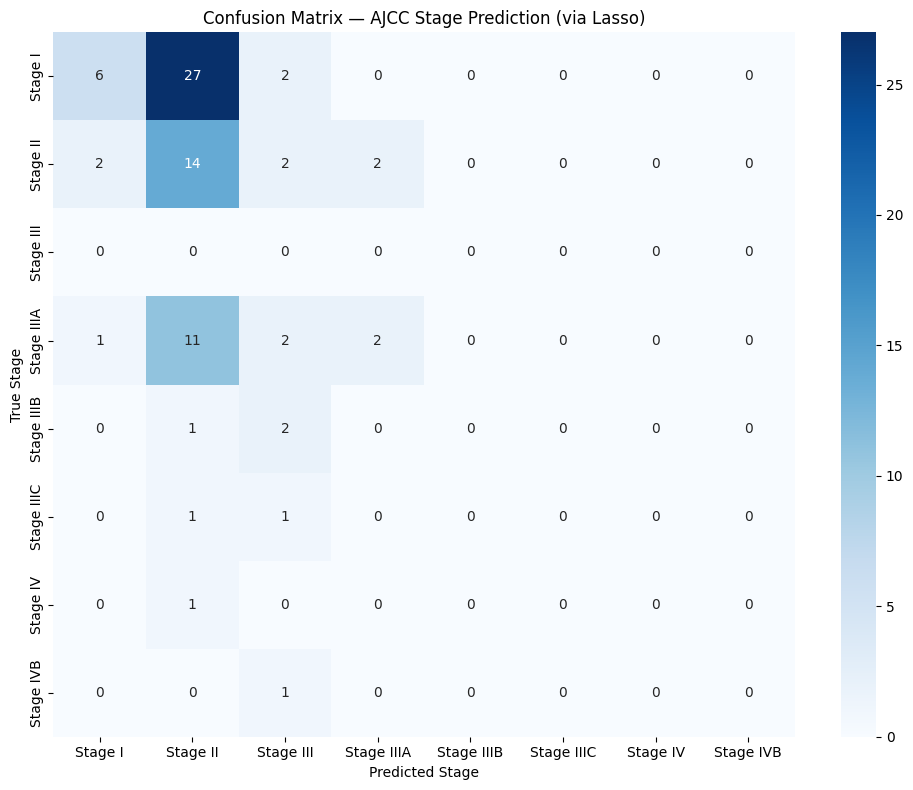

In [105]:
X2_test_scaled = scaler2.transform(X2_test)
y2_pred_continuous = lasso2.predict(X2_test_scaled)

y2_pred = np.round(y2_pred_continuous).astype(int)
y2_pred = np.clip(y2_pred, 0, len(stage_order) - 1)  # Clamp to valid range

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y2_test, y2_pred)
print(f"\nMean Absolute Error (Ordinal Distance): {mae:.3f}")

from sklearn.metrics import classification_report, confusion_matrix

# Get all labels present in either y2_test or y2_pred
present_labels = sorted(set(np.unique(y2_test)) | set(np.unique(y2_pred)))
present_names = [stage_order[int(i)] for i in present_labels]

# Print classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred, labels=present_labels, target_names=present_names))

# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y2_test, y2_pred, labels=present_labels), annot=True, fmt='d',
            xticklabels=present_names, yticklabels=present_names, cmap="Blues")
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix — AJCC Stage Prediction (via Lasso)")
plt.tight_layout()
plt.show()

In [95]:

# ------------------------------------
# 3. days_to_death — Lasso regression
# ------------------------------------
mask3 = liver_combined_df['days_to_death.demographic'].notna()
X3 = genes_only[mask3]
y3 = liver_combined_df.loc[mask3, 'days_to_death.demographic']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3_train)

lasso3 = Lasso(alpha=0.1)
lasso3.fit(X3_scaled, y3_train)

selected_genes_3 = X3.columns[lasso3.coef_ != 0]
print("\n3. Genes selected for days_to_death (continuous regression):")
print(selected_genes_3.tolist())


3. Genes selected for days_to_death (continuous regression):
['ENSG00000005156', 'ENSG00000005339', 'ENSG00000005810', 'ENSG00000006016', 'ENSG00000007314', 'ENSG00000007866', 'ENSG00000008294', 'ENSG00000008838', 'ENSG00000010244', 'ENSG00000010292', 'ENSG00000010803', 'ENSG00000011304', 'ENSG00000012817', 'ENSG00000013503', 'ENSG00000014216', 'ENSG00000014919', 'ENSG00000025800', 'ENSG00000033327', 'ENSG00000037280', 'ENSG00000037757', 'ENSG00000038532', 'ENSG00000047617', 'ENSG00000048471', 'ENSG00000049192', 'ENSG00000049239', 'ENSG00000057252', 'ENSG00000058600', 'ENSG00000059145', 'ENSG00000063169', 'ENSG00000064932', 'ENSG00000065308', 'ENSG00000072133', 'ENSG00000073969', 'ENSG00000075035', 'ENSG00000076770', 'ENSG00000077157', 'ENSG00000078725', 'ENSG00000079432', 'ENSG00000083635', 'ENSG00000085741', 'ENSG00000086159', 'ENSG00000086848', 'ENSG00000088766', 'ENSG00000088899', 'ENSG00000089057', 'ENSG00000089063', 'ENSG00000090615', 'ENSG00000092009', 'ENSG00000094963', 'ENSG0

/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.410e+04, tolerance: 9.138e+03
  model = cd_fast.enet_coordinate_descent(


In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X3_test_scaled = scaler3.transform(X3_test)
y3_pred = lasso3.predict(X3_test_scaled)

mae = mean_absolute_error(y3_test, y3_pred)
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))  # Manually take square root
r2 = r2_score(y3_test, y3_pred)

print(f"MAE: {mae:.2f} days")
print(f"RMSE: {rmse:.2f} days")
print(f"R²: {r2:.3f}")

MAE: 451.58 days
RMSE: 715.84 days
R²: -0.405


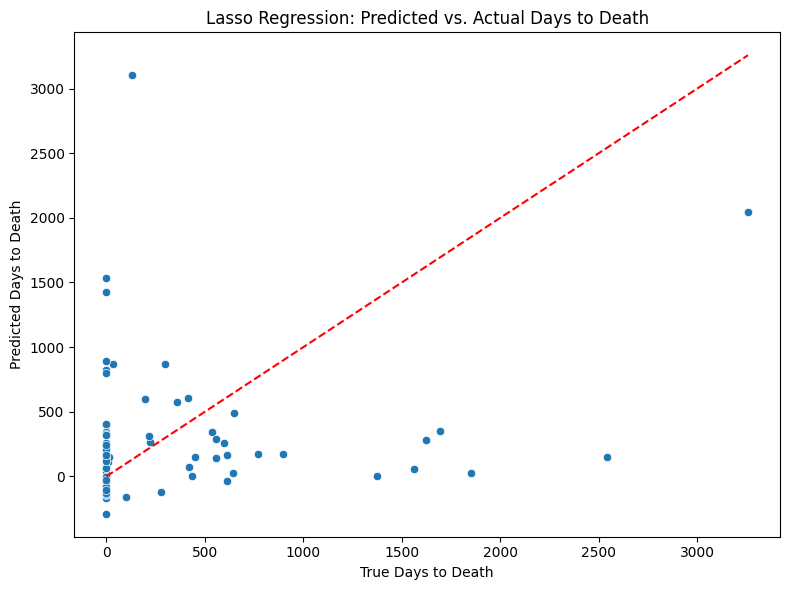

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y3_test, y=y3_pred)
plt.xlabel("True Days to Death")
plt.ylabel("Predicted Days to Death")
plt.title("Lasso Regression: Predicted vs. Actual Days to Death")
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'r--')
plt.tight_layout()
plt.show()

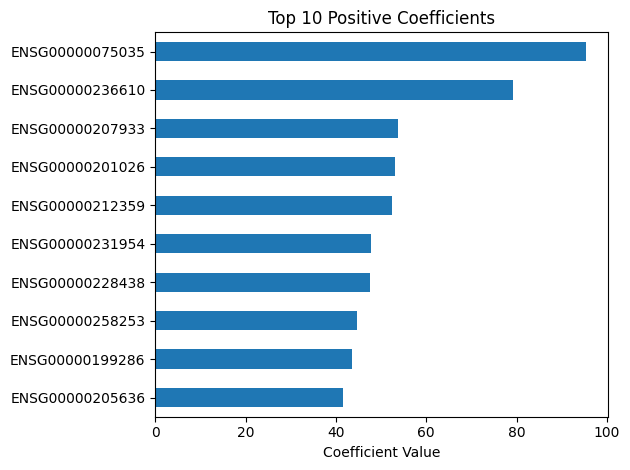

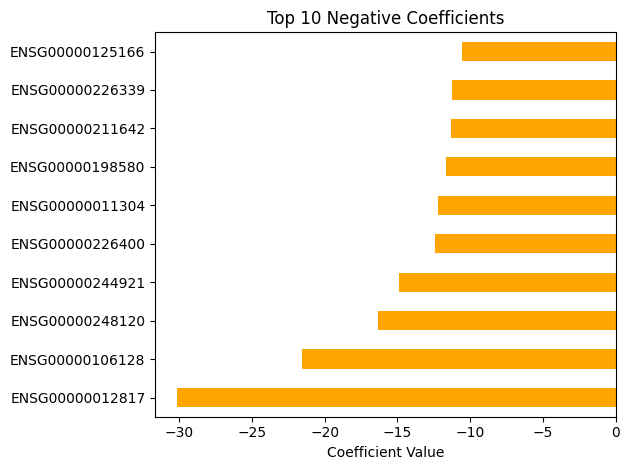

In [109]:
import pandas as pd

coef_series = pd.Series(lasso3.coef_, index=X3.columns)
top_genes_3 = coef_series[coef_series != 0].sort_values()

top_genes_3.tail(10).plot(kind='barh', title='Top 10 Positive Coefficients')
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

top_genes_3.head(10).plot(kind='barh', title='Top 10 Negative Coefficients', color='orange')
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

we did train-test before, now let's try cross validation

In [110]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Gene features
genes_only = liver_combined_df.loc[:, liver_combined_df.columns.str.startswith('ENSG')]

# ------------------------------------
# 1. is_alive — Logistic Regression (L1) with Cross-Validation
# ------------------------------------
X1 = genes_only
y1 = liver_combined_df['is_alive']

# Define stratified cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression with L1 penalty using cross-validation
clf1_cv = LogisticRegressionCV(
    Cs=10,
    cv=cv,
    penalty='l1',
    solver='saga',
    scoring='roc_auc',  # or 'accuracy', 'f1', etc.
    max_iter=10000,
    refit=True
)

# Use a pipeline to scale + fit
pipe1 = make_pipeline(StandardScaler(), clf1_cv)
pipe1.fit(X1, y1)

# Extract the trained logistic regression model
clf1_fitted = pipe1.named_steps['logisticregressioncv']
coefs = clf1_fitted.coef_[0]

# Get non-zero coefficient genes
selected_genes_1 = X1.columns[coefs != 0]
print("1. Genes selected for is_alive (binary classification with CV):")
print(selected_genes_1.tolist())

1. Genes selected for is_alive (binary classification with CV):
['ENSG00000000005', 'ENSG00000001036', 'ENSG00000001461', 'ENSG00000001497', 'ENSG00000001626', 'ENSG00000001629', 'ENSG00000001630', 'ENSG00000001631', 'ENSG00000002549', 'ENSG00000002586', 'ENSG00000002726', 'ENSG00000002745', 'ENSG00000002822', 'ENSG00000002933', 'ENSG00000003137', 'ENSG00000003147', 'ENSG00000003400', 'ENSG00000003436', 'ENSG00000003509', 'ENSG00000003987', 'ENSG00000004139', 'ENSG00000004142', 'ENSG00000004399', 'ENSG00000004455', 'ENSG00000004534', 'ENSG00000004766', 'ENSG00000004776', 'ENSG00000004779', 'ENSG00000004838', 'ENSG00000004846', 'ENSG00000004866', 'ENSG00000004939', 'ENSG00000004961', 'ENSG00000005007', 'ENSG00000005020', 'ENSG00000005022', 'ENSG00000005073', 'ENSG00000005108', 'ENSG00000005187', 'ENSG00000005189', 'ENSG00000005194', 'ENSG00000005243', 'ENSG00000005302', 'ENSG00000005379', 'ENSG00000005421', 'ENSG00000005469', 'ENSG00000005486', 'ENSG00000005513', 'ENSG00000005700', 'ENS

In [111]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter valid stages
stage_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC', 'Stage IV', 'Stage IVA', 'Stage IVB']
mask2 = liver_combined_df['ajcc_pathologic_stage.diagnoses'].isin(stage_order)

X2 = genes_only[mask2]
y2 = liver_combined_df.loc[mask2, 'ajcc_pathologic_stage.diagnoses']
y2_encoded = OrdinalEncoder(categories=[stage_order]).fit_transform(y2.values.reshape(-1, 1)).ravel()

# Scale full dataset
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Cross-validated predictions (e.g., 5-fold CV)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso2_cv = Lasso(alpha=0.1)
y2_pred_continuous = cross_val_predict(lasso2_cv, X2_scaled, y2_encoded, cv=kf)

# Post-process predictions
y2_pred = np.round(y2_pred_continuous).astype(int)
y2_pred = np.clip(y2_pred, 0, len(stage_order) - 1)


Mean Absolute Error (Ordinal Distance): 1.091

Classification Report:
              precision    recall  f1-score   support

     Stage I       0.56      0.19      0.29       190
    Stage II       0.24      0.73      0.37        96
   Stage III       0.00      0.00      0.00         6
  Stage IIIA       0.50      0.01      0.03        71
  Stage IIIB       0.00      0.00      0.00         8
  Stage IIIC       0.00      0.00      0.00        10
    Stage IV       0.00      0.00      0.00         2
   Stage IVA       0.00      0.00      0.00         1
   Stage IVB       0.00      0.00      0.00         2

    accuracy                           0.28       386
   macro avg       0.14      0.10      0.08       386
weighted avg       0.43      0.28      0.24       386



/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

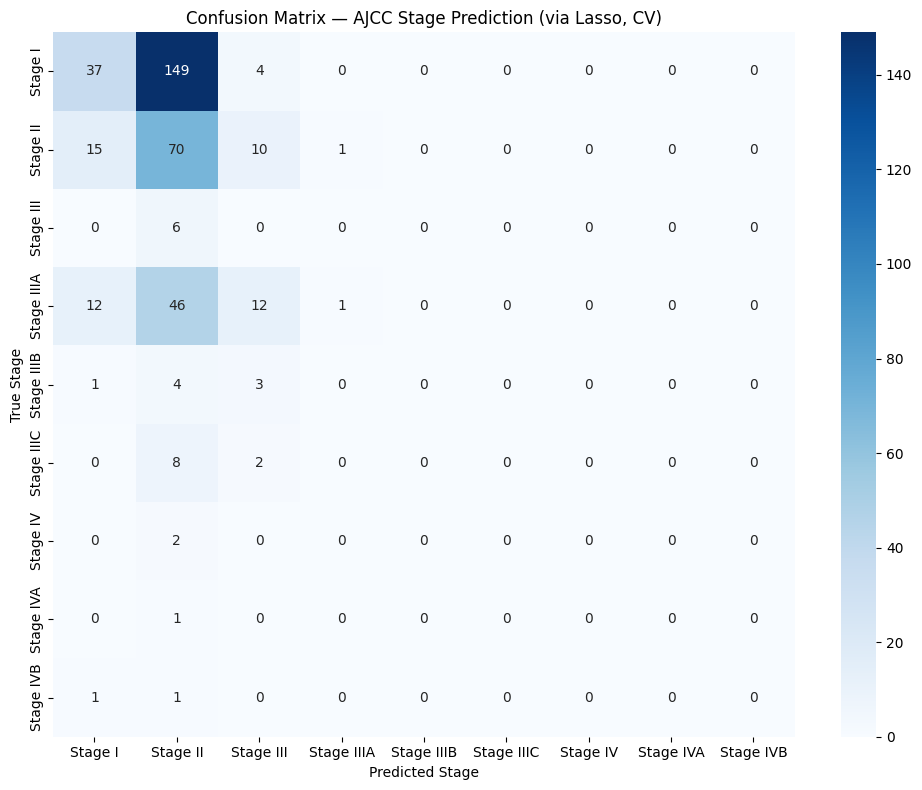

In [112]:
# --- Evaluation ---
# MAE (ordinal distance)
mae = mean_absolute_error(y2_encoded, y2_pred)
print(f"\nMean Absolute Error (Ordinal Distance): {mae:.3f}")

# Classification report
present_labels = sorted(set(np.unique(y2_encoded)) | set(np.unique(y2_pred)))
present_names = [stage_order[int(i)] for i in present_labels]

print("\nClassification Report:")
print(classification_report(y2_encoded, y2_pred, labels=present_labels, target_names=present_names))

# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y2_encoded, y2_pred, labels=present_labels),
            annot=True, fmt='d',
            xticklabels=present_names, yticklabels=present_names,
            cmap="Blues")
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix — AJCC Stage Prediction (via Lasso, CV)")
plt.tight_layout()
plt.show()

In [113]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Filter to valid entries
mask3 = liver_combined_df['days_to_death.demographic'].notna()
X3 = genes_only[mask3]
y3 = liver_combined_df.loc[mask3, 'days_to_death.demographic']

# Scale full data
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso3_cv = Lasso(alpha=0.1)

# Get cross-validated predictions
y3_pred = cross_val_predict(lasso3_cv, X3_scaled, y3, cv=kf)

/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.709e+04, tolerance: 9.138e+03
  model = cd_fast.enet_coordinate_descent(
/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.131e+04, tolerance: 1.098e+04
  model = cd_fast.enet_coordinate_descent(
/Users/tirdodbehbehani/.pyenv/versions/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

In [115]:
# Performance metrics
mae = mean_absolute_error(y3, y3_pred)
rmse = np.sqrt(mean_squared_error(y3, y3_pred))
r2 = r2_score(y3, y3_pred)

print(f"\nModel 3 — Cross-Validated Performance:")
print(f"MAE:  {mae:.2f} days")
print(f"RMSE: {rmse:.2f} days")
print(f"R²:   {r2:.3f}")


Model 3 — Cross-Validated Performance:
MAE:  344.79 days
RMSE: 586.74 days
R²:   -0.107
